# **Review: 회귀**
### **0-1) 회귀란?**
연속적인 데이터에서 패턴을 찾아내는 통계적 방법이다.
- 종류: 선형, 비선형, 릿지, 라쏘, 다항
- 활용: 요약, 예측, 시계열 등
- 평가지표: MSE, MAE, R-Square, Adjusted R-Square, AIC, BC
- 지도학습: 정답 데이터 O
- 비지도학습: 정답 데이터 X
> 데이터 분석의 유용한 통계적 도구이자, ML/DL 이해의 밑바탕

### **0-2) 단순/다중선형회귀분석**
- 단순선형회귀분석: 독립변수 한 개
- 다중선형회귀분석: 독립변수 두 개 이상

### **0-3) 최소제곱법(OLS)**
- 잔차 = 예측값 - 관측값
- 잔차 제곱 합을 최소화하는 회귀선을 찾는 방법


# **1. 선형회귀**

### **1-0) 전체적인 회귀 분석 프로세스**
**1. 사전 검증**
- 데이터 탐색, 전처리
- 회귀 분석 기본 6 가정 검토

**2. 모델 생성 및 모델 fit**
- 회귀 모델 생성, 모델 설정, 모델 학습
- 유의성 검정: F-test, T-test

**3. 모델 성능 평가**: 결정계수, 검증 가능한 가설 검토

**4. 모델 성능 개선**: 불필요 변수 제거, 비선형 모델 활용

### **1-1) 다중선형회귀의 수식적 이해**

$$
y_i = \beta_0+\beta_1X_{1i}+\beta_2X_{2i}+...\beta_kX_{ki}+\varepsilon_i
$$

- $y_i$ : 종속변수
- $X_{1i}, X_{2i}, ... , X_{ki}$ : 독립변수들
- $\beta_0$ : 절편
- $\beta_1, \beta_2, ..., \beta_k$ : 회귀계수들
- $\epsilon_i$  : 오차항

여기서 상수항(절편?)과 오차항을 제거하면 아래와 같다.

$$
y=w_0x_0+w_1x_1+\cdot\cdot\cdot+w_mx_m=\sum_{i=0}^mw_ix_i=w^Tx
$$

- 선형회귀식: 종속변수(y)에 대한 종속변수의 가중평균
  - 가중치를 곱함으로써 y를 얼마나 잘 설명하는지
- 선형회귀를 모든 상황에 쓸 수 있는 것은 아님.

### **1-2) 다중선형회귀의 기본가정**

- 선형회귀를 사용하려면 가정 여섯 개가 필요하다.
- 이 가정을 만족하지 않으면 신뢰성이 떨어지고, 분석이 불가능할 수도 있다.

> ### 가정 1. 선형성(linearity)
$$
E(y|X) = \beta_1+\beta_2X_2+...+\beta_nX_n
$$
- 종속변수와 설명변수가 선형적이어야 한다.
- scattor plot

> ### 가정2: 독립성(Independence)
$$
X_i, X_j \ is \ linearly\ independent \ for\ all \ i,j
$$
- 각 설명변수가 서로 linear independence 해야 한다.
- 선형독립이 아닌 경우 다중공선성이 있다.
  - 다중공선성: 독립변수끼리 강한 상관관계가 있어서 어떤 게 종속변수에 큰 영향 주는지 알 수 없는 상태
  - VIF, 상관계수 구해보기 
  - 변수 제거, 규제 선형 모델, PCA 등

> ### 가정3: 오차항의 평균은 0이다(0에 가까워야 한다)
$$
E(\varepsilon_i|X_i) = 0
$$
- 오차항(= 백색잡음): 실제값과 예측값의 차
- 특정 패턴 없이 랜덤하게 변하는 신호
- 백색잡음은 랜덤이니까 평균이 어디에 치우치면 안 돼서 평균이 0이어야 함.
- 0이 아니면 데이터 패턴 반영 못 하는 것.
- np.mean(residuals)

> ### 가정4: 등분산성(Homoscedasticity)
$$
Var(\varepsilon_i|X_i) = \sigma^2$$
- 오차항의 분산이 일정해야 함.
- 일정하지 않으면 회귀 분석 결과가 정확하지 않을 수 있다.
- 등분산성이 일정하지 않으면 이분상성: 고소득으로 갈수록 정확도가 떨어짐

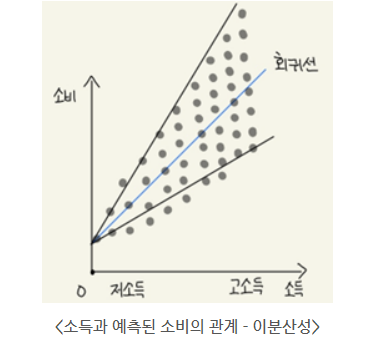

- 등분산성이 일정하면 아래처럼: 전체 데이터에 대해 일정한 정확도

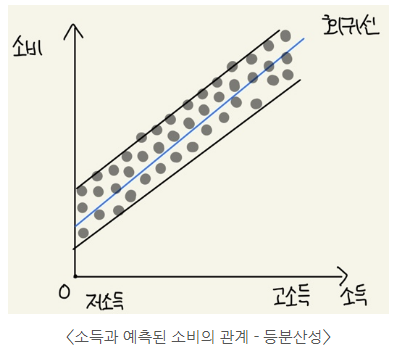

- 등분산성 보기
  - 잔차의 도표화
  - Brown-Forsythe, Breusch-Pagan 검정

> ### 가정5: 오차항은 자기상관되어 있지 않다(non-autocorrelation)

$$Cov(\varepsilon_i, \varepsilon_j|X_i) =0$$

- 오차항의 공분산(Cov)은 항상 0이어야 된다.
  - 공분산: 두 변수 간 상관된 정보
    - Cov(X,Y) > 0: 양의 상관관계
    - Cov(X,Y) < 0: 음의 상관관계
    - Cov(X,Y) = 0: 독립
- 오차항의 공분산이 0이 아니면 자기상관 있음
  - 자기상관: 현재값과 과거값이 상관관계를 가지는 것(시계열에 많음)
  - 이전 데이터 패턴을 학습해 반복적 오류를 만들 수 있음.
  - 자기상관 보기
    - 더빈-왓슨 검정
    - ACF, PACF 함수

> ### 가정6(선택): 정규성(normality)

$$\varepsilon_i \sim N(0, \sigma^2)$$

- 오차항이 정규분포를 따른다.
- 위배여도 다중선형회귀분석 결과에 큰 영향 X
- p-value 계산 공식이 가정6을 만족하기 때문에 p-value로 유의미한 해석을 하려면 이 가정이 만족해야 함.
- 가정6이 위배되면 p-value가 잘못 계산되어 신뢰성이 떨어짐.
- 정규성 보기
  - 샤피로-윌크 검정
  - 자퀴-베라 검정
  - Q-Q plot

### **1-3) 회귀분석 평가방법**

1. 시각화
- 데이터 전반 잘 요약
- 어떤 회귀선이 더 잘 요약하는지 알기 어려움

2. 통계지표
- R-square 등

**모델 유의성 검정**
- Prob(F-statistic)
  - 검정 대상: 전체 모델
  - 회귀 모델 유의미한지
    - H0: 모든 회귀 계수가 0이다.
    - H1: 적어도 하나의 회귀 계수는 0이 아니다.
  - F-statistic이 클수록 통계적으로 유의미하다.
  - Prob(F-statistic) < 0.05면 유의미

- T-statistic
  - 검정 대상: 개별 변수
  - 특정 독립변수 유의미한지
    - H0: 해당 변수의 회귀 계수가 0이다.
    - H1: 해당 변수의 회귀 계수는 0이 아니다.
  - p < 0.05면 유의미

**모델의 성능 평가**
- R-squared
  - 모델이 설명하는 데이터의 총 변동 중 설명된 비율을 나타냄.
  - 모델을 사용할 때 얼마나 더 정확한 예측인지(잘 설명하는지)
  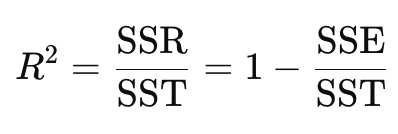
  - 0 ~ 1 사이의 값: 1에 가까울수록 잘 설명. 0이면 설명 아예 못함
- Adjusted R-squared
  - 결정계수는 독립변수 수가 증가하면 자연스럽게 증가함.
  - 관련성 없는 변수를 추가해도 결정계수가 증가하기 때문에 Adjusted를 씀.
  - 변수 증가에 덜 만감하다.
  - k가 증가하면 전체 값이 감소 -> 변수 증가에 따른 걸 상쇄함.
$$
\overline{R}^2 = \frac{SSR}{SST}\frac{n-1}{n-k}=1-(\frac{SSE/(n-k)}{SST/(n-1)})
$$
  

- AIC, BIC
  - 정보 기준(information criteria)라 불리며 낮을수록 좋다.
  - AIC = Akaike information criterion
    - BIC에 비해 복잡성 패널티가 작음.
  - BIC(SC)
    - SC = Schwarz Criterion, BIC = Bayesian Information Criterion
    - AIC보다 엄격함. 데이터의 양에 따라 더 강한 패널티

# **2. 비선형 회귀**

### **2-1) 다항식 회귀모델(Polynomial regression model)**
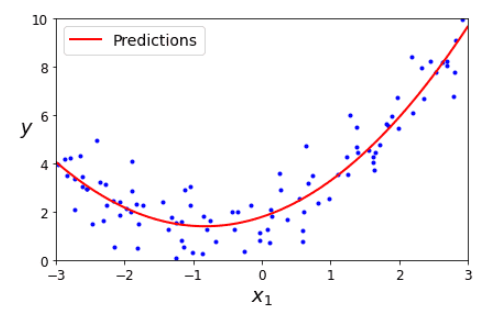
$$Y=a+bX+cX^2+dX^3+\cdot\cdot\cdot$$
- 독립 변수에 거듭제곱항 추가 -> 비선형 특성 모델링
- 기존 선형모델에 거듭제곱항을 추가하고 그 상태에서 선형회귀 적용
- 장점: 선형모델보다 더 fit하게 그릴 수 있음.
- 단점: feature가 너무 많으면 overfitting(릿지, 라쏘 규제 이용하기)
- 곡선 데이터에 유용(성장률, 감소율 등)


### **2-2) 지수 회귀모델(Exponential model)**
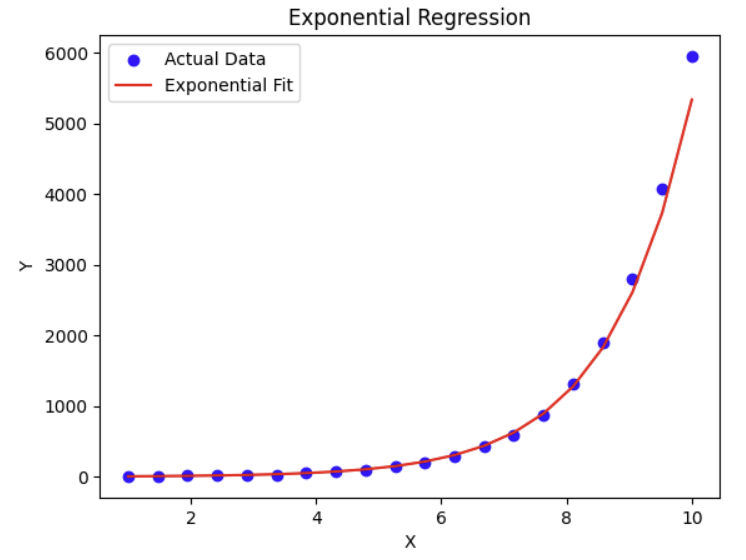
- 종속 변수가 지수적으로 변화하는 관계
- $Y = ae^{bX}$ 데이터 형식인데, 여기에 양변 로그 취하기.
- $\ln Y=\ln a+bX$
- 여기서 lnY -> Y’, ln a -> a’이면,  Y’=a’+bX가 됨.
- 선형회귀와 비슷한 모습이다. 따라서 종속변수에 로그 취한 후 선형회귀 적용
- Y’(lnY) 기존 데이터(Y)와 형태가 달라짐.
- 원래 데이터 형태로 복구하기 위해 예측값에 적용.

**<정리>**
  1. 종속변수 Y에 로그함수 취하기
  2. 변환된 Y와 기존 독립변수 X에 선형회귀 적용(모델이 ln Y와 X의 선형관계를 학습함)
  3. 모델이 예측한 Y에 $(e^x)$ 적용하여 원래 Y로 변형

- 지수적으로 증가하거나 감소하는 데이터에 유용(기술 발전, 투자 수익률 증가 등)

### **2-3) 로그 회귀모델(log regression model)**
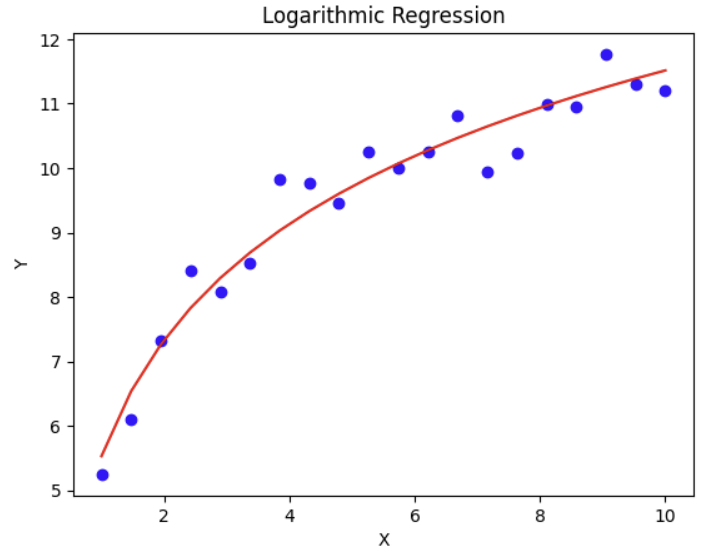
- 종속변수와 독립변수 간 관계가 로그를 통해 잘 표현될 때
-  $Y=a+b\log(X)$를 따름.
1. 독립변수 X에 로그함수 적용
2. 선형회귀 적용
- Y값 그대로 예측되므로 처리 없이 바로 쓸 수 있음.
- 초기 빠른 증가, 점점 증가율이 줄어들 때 유용(인구성장, 감염병 확산 등)

### **2-4) 스플라인 회귀 (Spline Regression)**
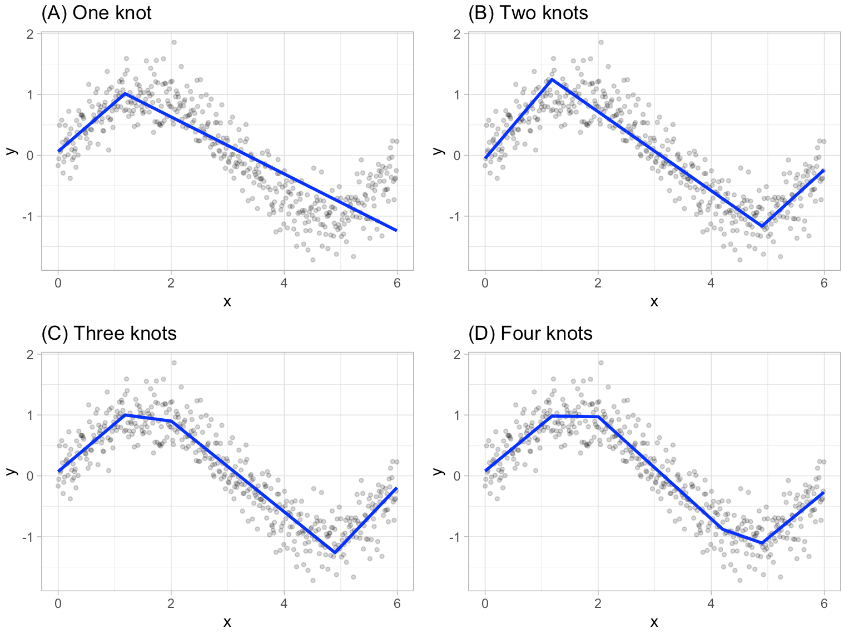
- 데이터를 구간으로 나누고 거기서 별도의 회귀모델로 예측하는 방식
- 구간 경계에서 연속성을 유지해야 한다.
- 데이터 패턴이 여러 구간에서 서로 다르게 나타날 때(계절 별 변화하는 판매량 소매 데이터 등)